# 라이브러리 다운로드

In [ ]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [ ]:
# 구글드라이브와 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 데이터 준비

In [ ]:
# 해당 데이터들은 개인 정보 이슈로 모델링에만 활용되고 폐기하였습니다,
# filename = '../data/data_통합본.csv'
# filename2 = '../data/data2.csv'
# filename3 = '../data/data3.csv'

filename4 = '../data/data4.csv'
filename5 = '../data/data5.csv'
filename6 = '../data/data6.csv'

data = pd.read_csv(filename, header = None)
data2 = pd.read_csv(filename2, header = None)
data3 = pd.read_csv(filename3, header = None).iloc[:70,:]

data4 = pd.read_csv(filename4, encoding='cp949', header = None).iloc[:30,:]
data5 = pd.read_csv(filename5, encoding='cp949', header = None)
data6 = pd.read_csv(filename6, header = None)

In [ ]:
data.columns = ['phising']+[i for i in range(68)]
concat = pd.DataFrame({'phising':[1 for i in range(30)]})
concat2 = pd.DataFrame({'phising':[0 for i in range(len(data2))]})
concat3 = pd.DataFrame({'phising':[0 for i in range(len(data3))]})
data6.columns = ['phising']+[i for i in range(48)]

data2_con = pd.concat([concat2, data2], axis=1)
data3_con = pd.concat([concat3, data3], axis=1)
data4_con = pd.concat([concat, data4], axis=1)
data5_con = pd.concat([concat, data5], axis=1)

data = pd.concat([data, data2_con, data4_con, data5_con, data6]).reset_index(drop=True)

In [ ]:
def change_name(sent):
  name = sent.split(' : ')[0]
  text = sent.split(' : ')[1]
  new = '[' + name + '] ' + text
  return new

new_df = pd.DataFrame(index=range(0,len(data3_con)), columns=range(61))
for i in range(len(data3_con)):
  new_df.iloc[i,0] = data3_con['phising'][i]
  for j in range(1,61):
    try:
      new_df.iloc[i,j] = change_name(data3_con.iloc[i,j])
    except:
      pass

new_df.columns = ['phising']+[i for i in range(60)]
data = pd.concat([data,new_df]).reset_index(drop=True)
data

,phising,0,1,2,3,4,5,6,7,8,...,58,59,60,61,62,63,64,65,66,67
0,1,[피싱범] 엄마 바빠?,[피싱범] 지금 핸드폰 액정 나가서 매장에 맡기고 컴퓨터로 카톡 하고있어,[피해자] 아 ~~그래,[피싱범] 엄마 지금 시간 있어?,[피싱범] 친한 선배가 문화상품권 사달라고 부탁하는데 핸드폰 고장나서 못하고 있어 ...,[피해자] 어떻게,[피싱범] 가까운 편의점에 가서 문화상품권 3만원권 15장 구입해줘,[피해자] 그래서 어떻게 하면 되는데,[피싱범] 엄마 구입하면 톡줘,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,[피싱범] 언니 바빠?,[피해자] 왜,[피싱범] 부탁 하나만 해도 돼?,[피해자] 머,[피싱범] 지금 급히 송금할 데 있어 그러는데 대신 해주면 안돼? 저녁에 다시 보내줄게,[피해자] 미친ㅡㅡ,[피해자] 야 니가 나보다 돈 더 많잖아,[피해자] 없어 돈 바빠죽겠는데 진짜,[피싱범] 알앗어,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,[피싱범] 바뻐?,[피해자] 수업하는중,[피싱범] 이모 부탁잇어 그러는데…,[피해자] 오늘 학교 안갔어? 무슨 부탁?ㅎㅎ,"[피싱범] 급히 송금할거 있는데, 이모 먼저 보내주면 안돼?",[피싱범] 내일 오전으로 보내줄게..,[피해자] 얼마정도 필요한데?,[피싱범] 586만 6천원…,[피해자] ㅋㅋ 너 미쳤구나.. 너희 엄마한테 먼저 물어보고. 이모 신불자인거 알잖...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,[피싱범] 아빠,[피싱범] 저 핸드폰 액정이 깨져서 컴퓨터로 카톡을 하고 있어요ㅠㅠ,[피싱범] 아빠,[피싱범] 안들려요?,[피해자] 아직도 전화안대니,[피싱범] 네 내일 찾으러 가야 해요,[피싱범] 아빠 지금 바빠요?,[피해자] 알앗다 건강 조심하고 아빤 설사 병낫다,[피싱범] ㅠㅠ 괜찮아요?,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,[피싱범] 엄마 지금 바빠?,[피싱범] 나 핸드폰 액정 고장나서 수리 맡기고 컴터로 카톡올랐어,[피해자] 알겠어염,[피싱범] 지금 많이 바빠?,[피싱범] 안 바쁘면 머 좀 부탁하려고,[피해자] 왜?,[피해자] 부탁해봐,[피싱범] 친한 선배한테 입금 먼저 받고 문화상품권 구매 부탁을 받았는데,[피싱범] 폰땜에 내꺼로 온라인 주문이 안돼서,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,0,[신민아] 사진,[신수빈] 오잉,[신수빈] 뚫었니?,[신민아] 우에,[신수빈] 웨에ㅔ,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
372,0,[신민아] 웨이터,[신수빈] 터미네이터,[신민아] 너어디야,[신수빈] 가오동,[신민아] 왜,[신수빈] 할머니댁왔는데;,[신민아] 사진,[신민아] 좀 귀엽지,[신수빈] 너무기엽다,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
373,0,[신민아] 복수동에서 은행동가는길 알려주면 용서해줌,[신수빈] 314,[신수빈] 타고,[신수빈] 으능정이에서,[신수빈] 내리렴,[신민아] 어디서,[신민아] 314타,[신민아] 어느방향으로,[신민아] 어뜨케,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
374,0,[신민아] 제발,[신민아] 그랬으면,[신수빈] 호,[신수빈] ㅗㅗ,[신민아] 옵치만 하야디,[신수빈] 힝,[신수빈] 난집간당,[신수빈] 오늘ㄹ시사회가,[신수빈] ㅎ헤헿,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# data.to_csv('/content/drive/MyDrive/Colab Notebooks/캡스톤 디자인/통합본2.csv',header=False, index=False)

## 텍스트 처리 함수

In [ ]:
# 메세지 쓴 사람 추출
# 시간 없는 경우 / 있는 경우 둘다 가능

import re

def get_writer(line):
  split_person = re.split('\]', line)
  writer = split_person[0].strip('[')
  return writer

In [ ]:
# 대화상대 이름 모두 추출
def get_all_writers(conversation):
  name = []
  try:
    for i in range(len(conversation)):
      line = str(conversation[i])
      person = get_writer(line)
      name.append(person)
  except:
    pass
  name = list(set(name))
  if 'nan' in name:
    name.remove('nan')
  if 'None' in name:
    name.remove('None')
  return name

# 시간/ 대화상대이름 삭제하기
def delete_time_name(conversation):
  conversation_del = []
  try:
    for i in range(len(conversation)):
      line = str(conversation[i])
      conversation_del.append(re.split('\] ', line)[-1])
      if 'nan' in conversation_del:
        conversation_del.remove('nan')
      if 'None' in conversation_del:
        conversation_del.remove('None')
  except:
    pass
  return conversation_del

In [ ]:
# 대화상대별 대화 나누기
def split_conversation2(conversation, opp_list):
  conversation1 = []
  conversation2 = []
  person_list = get_all_writers(conversation)

  try:
    for i in range(len(conversation)):
      line = str(conversation[i])
      if get_writer(line) in opp_list:
        conversation1.append(line)
      else:
        conversation2.append(line)
  except:
    pass

  conversation1 = delete_time_name(conversation1)
  conversation2 = delete_time_name(conversation2)

  conversation1 = " ".join(conversation1) # 상대방
  conversation2 = " ".join(conversation2) # 나

  return conversation1, conversation2, person_list

## 데이터셋 정리(대화분리)

In [ ]:
# 빈 데이터 프레임 생성
df = pd.DataFrame(index=range(0,len(data)), columns=range(3))
df

,0,1,2
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
371,NaN,NaN,NaN
372,NaN,NaN,NaN
373,NaN,NaN,NaN
374,NaN,NaN,NaN


In [ ]:
opp_list = ['<저장된 상대 이름 추가하기>']

for i in range(len(data)):
  conversation = data.iloc[i,:]

  df.iloc[i,0] = data.iloc[i,:].phising

  line = split_conversation2(conversation,opp_list)[0]
  df.iloc[i,1] = re.split('nan',line)[0]
  line2 = split_conversation2(conversation,opp_list)[1]
  df.iloc[i,2] = re.split('nan',line2)[0]

In [ ]:
df.columns=['label', 'phising', 'me']
df = df[df.phising != ""].reset_index(drop=True) # 텍스트 없는 행 삭제
df

,label,phising,me
0,1,엄마 바빠? 지금 핸드폰 액정 나가서 매장에 맡기고 컴퓨터로 카톡 하고있어 엄마 지...,아 ~~그래 어떻게 그래서 어떻게 하면 되는데 알았어 핸드폰으로 구입하는거니 카드는...
1,1,언니 바빠? 부탁 하나만 해도 돼? 지금 급히 송금할 데 있어 그러는데 대신 해주면...,왜 머 미친ㅡㅡ 야 니가 나보다 돈 더 많잖아 없어 돈 바빠죽겠는데 진짜
2,1,"바뻐? 이모 부탁잇어 그러는데… 급히 송금할거 있는데, 이모 먼저 보내주면 안돼? ...",수업하는중 오늘 학교 안갔어? 무슨 부탁?ㅎㅎ 얼마정도 필요한데? ㅋㅋ 너 미쳤구나...
3,1,아빠 저 핸드폰 액정이 깨져서 컴퓨터로 카톡을 하고 있어요ㅠㅠ 아빠 안들려요? 네 ...,아직도 전화안대니 알앗다 건강 조심하고 아빤 설사 병낫다 병원 갔다 왔다 이체가 뭔...
4,1,엄마 지금 바빠? 나 핸드폰 액정 고장나서 수리 맡기고 컴터로 카톡올랐어 지금 많이...,알겠어염 왜? 부탁해봐 그럼 그 선배한테 사라고 하면 안돼? 그래 해줄게 글쎄 없을...
...,...,...,...
360,0,사진 우에,오잉 뚫었니? 웨에ㅔ
361,0,웨이터 너어디야 왜 사진 좀 귀엽지 알아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이모티콘...,터미네이터 가오동 할머니댁왔는데; 너무기엽다 뭉치 ㅠㅠ ...? 이모티콘 이모티콘...
362,0,복수동에서 은행동가는길 알려주면 용서해줌 어디서 314타 어느방향으로 어뜨케 ㅍ ?...,314 타고 으능정이에서 내리렴 초록3에서 타도 되고 신계초에서 타도돼ㅐ 방향ㅇ기억...
363,0,제발 그랬으면 옵치만 하야디 그딴건 모르겠고 난 주짓수가,호 ㅗㅗ 힝 난집간당 오늘ㄹ시사회가 ㅎ헤헿 힝밍밍 이제집가용


# 텍스트분석 전처리

## 라이브러리

In [ ]:
!pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.4 MB 1.4 MB/s 
     |████████████████████████████████| 453 kB 44.3 MB/s 


In [ ]:
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

맞춤법 교정 패키지

In [ ]:
#!pip install git+https://github.com/ssut/py-hanspell.git

단어 토크나이저 soynlp

In [ ]:
!pip install soynlp

## 형태소분석 / 불용어처리

In [ ]:
import re
from soynlp.normalizer import *

def preprocessing(text, okt, remove_stopwords = False, stop_words = []):
    # remove_stopword : 불용어를 제거할지 선택 기본값은 False
    # stop_word : 불용어 사전은 사용자가 직접 입력해야함 기본값은 비어있는 리스트

    # 한글 및 공백을 제외한 문자 모두 제거.
    text1 = re.sub("[^가-힣ㄱ-ㅎㅏ-ㅣ\\s]", "", text)


    repeat_text = repeat_normalize(text1, num_repeats=2)

    # okt 객체를 활용해서 형태소 단위로 나눈다.
    word = okt.morphs(repeat_text, stem=True)

    # 불용어 제거(선택적)
    if remove_stopwords:
        word = [token for token in word if not token in stop_words]

    return word

In [ ]:
#test1 = spell_checker.check('외않되')

#test1.checked

In [ ]:
# 불용어 제거
stop_words=set(['은','는','이','가','하','아','들','의','있','수','보','주','등','한','안','때','지','두', '이모티콘', '페이스톡 해요', '(광고)',
                'ㄱ','ㄴ','ㄷ','ㄹ','ㅁ','ㅂ','ㅅ','ㅇ','ㅈ','ㅊ','ㅋ','ㅌ','ㅍ','ㅎ','ㅛ','ㅕ','ㅑ','ㅐ','ㅔ','ㅗ','ㅓ','ㅏ','ㅣ','ㅠ','ㅜ','ㅡ',
                'ㅃ','ㅉ','ㄸ','ㄲ','ㅆ','ㅒ','ㅖ','ㅚ','ㅟ','ㅢ','ㅘ','ㅙ','ㅞ','ㅝ','ㄳ','ㄵ','ㄶ','ㄺ','ㄻ','ㄼ','ㄽ','ㄾ','ㄿ','ㅀ','ㅄ','ㅋㅋ','ㅇㅇ'])



okt=Okt()
clean_text=[]

for text in df['phising']:
    # 비어있는 데이터에서 멈추지 않도록 문자열인 경우에만 진행
    if type(text)==str:
        clean_text.append(preprocessing(text, okt, remove_stopwords=True, stop_words=stop_words))
    else:
        # string이 아니면 비어있는 값 추가
        clean_text.append([])

clean_text[:5]

[['엄마',
  '바쁘다',
  '지금',
  '핸드폰',
  '액정',
  '나가다',
  '매장',
  '에',
  '맡다',
  '컴퓨터',
  '로',
  '카톡',
  '하다',
  '엄마',
  '지금',
  '시간',
  '있다',
  '친하다',
  '선배',
  '문화',
  '상품권',
  '사',
  '달라',
  '고',
  '부탁',
  '하다',
  '핸드폰',
  '고장',
  '나서다',
  '못',
  '하고',
  '있다',
  '엄마',
  '먼저',
  '사주다',
  '가깝다',
  '편의점',
  '에',
  '가다',
  '문화',
  '상품권',
  '만원',
  '권',
  '장',
  '구입',
  '해주다',
  '엄마',
  '구입',
  '하다',
  '톡',
  '주다',
  '현금',
  '으로',
  '상품권',
  '구입',
  '하다',
  '있다',
  '엄마',
  '돼다',
  '엄마',
  '맞다',
  '엄마',
  '현금',
  '찾다',
  '구입',
  '해주다',
  '엄마',
  '구입',
  '하다',
  '엄마'],
 ['언니',
  '바쁘다',
  '부탁',
  '하나',
  '만',
  '해도',
  '돼다',
  '지금',
  '급하다',
  '송금',
  '하다',
  '데',
  '있다',
  '그렇다',
  '대신',
  '해주다',
  '돼다',
  '저녁',
  '에',
  '다시',
  '보내다',
  '알다'],
 ['바쁘다',
  '이모',
  '부탁',
  '잇다',
  '그렇다',
  '급하다',
  '송금',
  '하다',
  '있다',
  '이모',
  '먼저',
  '보내다',
  '돼다',
  '내일',
  '오전',
  '으로',
  '보내다',
  '만',
  '천원'],
 ['아빠',
  '저',
  '핸드폰',
  '액정',
  '깨다',
  '컴퓨터',
  '로',
  '카톡',
  '을',
  '하다',
  '있다',
  'ㅠㅠ',
  

In [ ]:
df['clean_text'] = clean_text
df

,label,phising,me,clean_text
0,1,엄마 바빠? 지금 핸드폰 액정 나가서 매장에 맡기고 컴퓨터로 카톡 하고있어 엄마 지...,아 ~~그래 어떻게 그래서 어떻게 하면 되는데 알았어 핸드폰으로 구입하는거니 카드는...,"[엄마, 바쁘다, 지금, 핸드폰, 액정, 나가다, 매장, 에, 맡다, 컴퓨터, 로,..."
1,1,언니 바빠? 부탁 하나만 해도 돼? 지금 급히 송금할 데 있어 그러는데 대신 해주면...,왜 머 미친ㅡㅡ 야 니가 나보다 돈 더 많잖아 없어 돈 바빠죽겠는데 진짜,"[언니, 바쁘다, 부탁, 하나, 만, 해도, 돼다, 지금, 급하다, 송금, 하다, ..."
2,1,"바뻐? 이모 부탁잇어 그러는데… 급히 송금할거 있는데, 이모 먼저 보내주면 안돼? ...",수업하는중 오늘 학교 안갔어? 무슨 부탁?ㅎㅎ 얼마정도 필요한데? ㅋㅋ 너 미쳤구나...,"[바쁘다, 이모, 부탁, 잇다, 그렇다, 급하다, 송금, 하다, 있다, 이모, 먼저..."
3,1,아빠 저 핸드폰 액정이 깨져서 컴퓨터로 카톡을 하고 있어요ㅠㅠ 아빠 안들려요? 네 ...,아직도 전화안대니 알앗다 건강 조심하고 아빤 설사 병낫다 병원 갔다 왔다 이체가 뭔...,"[아빠, 저, 핸드폰, 액정, 깨다, 컴퓨터, 로, 카톡, 을, 하다, 있다, ㅠㅠ..."
4,1,엄마 지금 바빠? 나 핸드폰 액정 고장나서 수리 맡기고 컴터로 카톡올랐어 지금 많이...,알겠어염 왜? 부탁해봐 그럼 그 선배한테 사라고 하면 안돼? 그래 해줄게 글쎄 없을...,"[엄마, 지금, 바쁘다, 나, 핸드폰, 액정, 고장, 나서다, 수리, 맡다, 컴터,..."
...,...,...,...,...
360,0,사진 우에,오잉 뚫었니? 웨에ㅔ,"[사진, 우, 에]"
361,0,웨이터 너어디야 왜 사진 좀 귀엽지 알아 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이모티콘...,터미네이터 가오동 할머니댁왔는데; 너무기엽다 뭉치 ㅠㅠ ...? 이모티콘 이모티콘...,"[웨이터, 너, 어디, 야, 왜, 사진, 좀, 귀엽다, 알, 나다, 저, 사주다, ..."
362,0,복수동에서 은행동가는길 알려주면 용서해줌 어디서 314타 어느방향으로 어뜨케 ㅍ ?...,314 타고 으능정이에서 내리렴 초록3에서 타도 되고 신계초에서 타도돼ㅐ 방향ㅇ기억...,"[복수동, 에서, 은행동, 가다, 알다, 용서, 해주다, 어디서, 타, 어느, 방향..."
363,0,제발 그랬으면 옵치만 하야디 그딴건 모르겠고 난 주짓수가,호 ㅗㅗ 힝 난집간당 오늘ㄹ시사회가 ㅎ헤헿 힝밍밍 이제집가용,"[제발, 그렇다, 오다, 하얗다, 그딴, 건, 모르다, 난, 주짓수]"


## 정수 인코딩 / 패딩

In [ ]:
# 정수 인코딩
tokenizer=Tokenizer()
tokenizer.fit_on_texts(clean_text)
print(tokenizer.word_index)
train_sequences=tokenizer.texts_to_sequences(clean_text)

# 단어 사전 형태
word_vocab=tokenizer.word_index

# 문장 최대 길이
MAX_SEQUENCE_LENGTH=100

# 학습 데이터를 벡터화
train_inputs = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
# 학습 데이터의 라벨
train_labels = np.array([df['label']])


{'하다': 1, '엄마': 2, '있다': 3, '에': 4, '지금': 5, '나': 6, '해주다': 7, '되다': 8, '폰': 9, '보내다': 10, '로': 11, '그렇다': 12, '부탁': 13, '돼다': 14, '만': 15, '급하다': 16, '으로': 17, '바쁘다': 18, '받다': 19, '안되다': 20, '을': 21, '요': 22, '사진': 23, '내': 24, '구매': 25, '먼저': 26, '이체': 27, '돈': 28, '아니다': 29, '없다': 30, '하고': 31, '아빠': 32, '좀': 33, '가다': 34, '보다': 35, '톡': 36, '수리': 37, '한테': 38, '뭐': 39, '고장': 40, '만원': 41, '알다': 42, '도': 43, '송금': 44, '대신': 45, '를': 46, '이다': 47, '맡다': 48, '중': 49, '저': 50, '스톡': 51, '나서다': 52, '잇다': 53, '시': 54, '핸드폰': 55, '계좌': 56, '친구': 57, '하나': 58, '거': 59, '제': 60, '카톡': 61, '해': 62, '드리다': 63, '네': 64, '가능하다': 65, '못': 66, '에서': 67, '너': 68, '문자': 69, 'ㅠㅠ': 70, '야': 71, '주다': 72, '나오다': 73, '인증': 74, '같다': 75, '나가다': 76, '상품권': 77, '다시': 78, '언니': 79, '오류': 80, '근데': 81, '시간': 82, '확인': 83, '넣다': 84, '이야': 85, '결제': 86, '선배': 87, '통장': 88, '왜': 89, '일': 90, '액정': 91, '맞다': 92, '바로': 93, '님': 94, '보이': 95, '오늘': 96, '추가': 97, '다': 98, '먹다': 99, '오다': 100, '컴퓨터': 101, '찾다': 10

In [ ]:
# 등장빈도수가 2개 미만인 경우
threshold = 2
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 2527
등장 빈도가 1번 이하인 희귀 단어의 수: 1330
단어 집합에서 희귀 단어의 비율: 52.63157894736842
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 8.215454938538514


In [ ]:
# vocab_size = total_cnt - rare_cnt + 1
vocab_size = total_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 2527


txt의 최대 길이 : 304
txt의 평균 길이 : 44.35342465753425


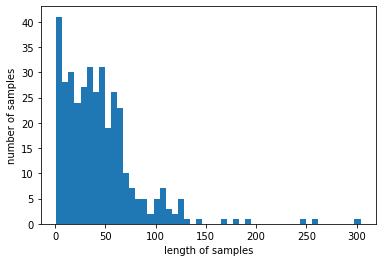

In [ ]:
print('txt의 최대 길이 :',max(len(txt) for txt in clean_text))
print('txt의 평균 길이 :',sum(map(len, clean_text))/len(clean_text))
plt.hist([len(txt) for txt in clean_text], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (count / len(nested_list))*100))

In [ ]:
max_len = 100
below_threshold_len(max_len, clean_text)

전체 샘플 중 길이가 100 이하인 샘플의 비율: 92.6027397260274


# 모델 생성

In [ ]:
train_inputs

array([[   2,   18,    5, ...,    0,    0,    0],
       [  79,   18,   13, ...,    0,    0,    0],
       [  18,  109,   13, ...,    0,    0,    0],
       ...,
       [ 804,   67, 1197, ...,    0,    0,    0],
       [ 755,   12,  100, ...,    0,    0,    0],
       [ 145,  736, 2525, ...,    0,    0,    0]], dtype=int32)

In [ ]:
train_labels = df.label
train_labels

0      1
1      1
2      1
3      1
4      1
      ..
360    0
361    0
362    0
363    0
364    0
Name: label, Length: 365, dtype: object

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import sequence
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train_inputs, train_labels, test_size=0.2, random_state=123)

# LSTM의 목표변수는 one-hot encoding
y_train = np_utils.to_categorical(y_train) # one_hot으로 변형
y_test = np_utils.to_categorical(y_test) # 3 -> [0,0,0,1,0, ..]

In [ ]:
a = [1 for i in y_test if i[0]==1]
b = [1 for i in y_test if i[0]==0]

print(len(a))
print(len(b))

37
36


In [ ]:
# 모델 구축 함수
def create_model():
  model = Sequential()
  model.add(Embedding(vocab_size + 1, len(X_train[0])))
  model.add(LSTM(len(X_train[0])))
  model.add(Dropout(0.3))
  model.add(Dense(32, activation="relu"))
  model.add(Dense(2, activation='softmax'))
  return model

In [ ]:
print(create_model().summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         252800    
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense (Dense)               (None, 32)                3232      
                                                                 
 dense_1 (Dense)             (None, 2)                 66        
                                                                 
Total params: 336,498
Trainable params: 336,498
Non-trainable params: 0
_________________________________________________________________
None


## LSTM

In [ ]:
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=3) #patience=3은 3번 참는다는 느낌
history = model.fit(X_train, y_train, batch_size=100, epochs=20, validation_data=(X_test,y_test), callbacks=[early_stopping])

Epoch 1/20
3/3 [==============================] - 5s 1s/step - loss: 0.6938 - accuracy: 0.4932 - val_loss: 0.6917 - val_accuracy: 0.5753
Epoch 2/20
3/3 [==============================] - 1s 283ms/step - loss: 0.6919 - accuracy: 0.5068 - val_loss: 0.6882 - val_accuracy: 0.5890
Epoch 3/20
3/3 [==============================] - 1s 280ms/step - loss: 0.6915 - accuracy: 0.5377 - val_loss: 0.6875 - val_accuracy: 0.5890
Epoch 4/20
3/3 [==============================] - 1s 294ms/step - loss: 0.6896 - accuracy: 0.5616 - val_loss: 0.6874 - val_accuracy: 0.6301
Epoch 5/20
3/3 [==============================] - 1s 280ms/step - loss: 0.6880 - accuracy: 0.5685 - val_loss: 0.6840 - val_accuracy: 0.6301
Epoch 6/20
3/3 [==============================] - 1s 287ms/step - loss: 0.6837 - accuracy: 0.5719 - val_loss: 0.6775 - val_accuracy: 0.6301
Epoch 7/20
3/3 [==============================] - 1s 291ms/step - loss: 0.6810 - accuracy: 0.5514 - val_loss: 0.6632 - val_accuracy: 0.6301
Epoch 8/20
3/3 [=======

In [ ]:
#모델 저장
#model.save('/content/drive/MyDrive/Colab Notebooks/캡스톤 디자인/kfold_model.h5')

Text(0.5, 1.0, 'Accuracy & loss')

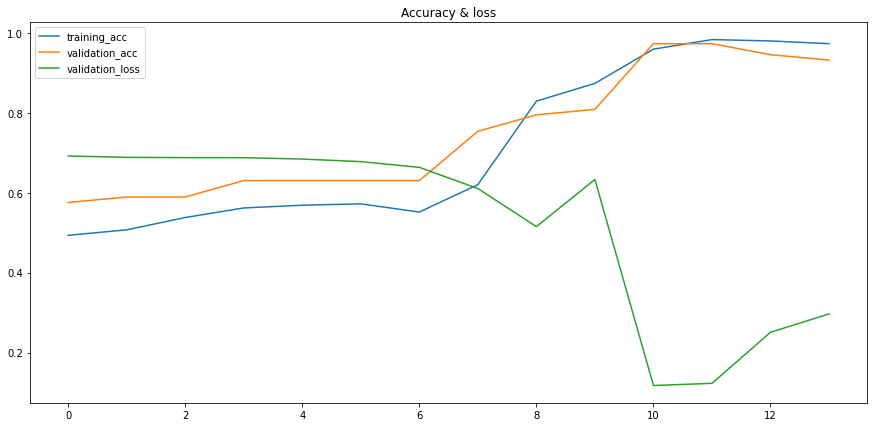

In [ ]:
ran_num = 14
#plot x축 range() Epoch만큼 수정하기
plt.figure(figsize=(15, 7))
plt.plot(range(ran_num), history.history['accuracy'])
plt.plot(range(ran_num), history.history['val_accuracy'])
plt.plot(range(ran_num), history.history['val_loss'])

plt.legend(['training_acc', 'validation_acc', 'validation_loss'])
plt.title('Accuracy & loss')

## k-fold validation 적용 LSTM

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
from keras.models import load_model

def kfold_LSTM(k, X_train, X_test, y_train, y_test):
  X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.2, random_state=123) # valid set 나누기

  inputs = np.concatenate((X_train, X_valid), axis=0)
  targets = np.concatenate((y_train, y_valid), axis=0)

  scores = [0] # 각 회차에서의 테스트 셋 정확도

  kfold = KFold(n_splits=k, shuffle=True, random_state=123)
  fold_no = 1
  best_num = 0
  for train, test in kfold.split(inputs, targets):

    model = create_model()
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    early_stopping = EarlyStopping(monitor='loss', patience=3) #patience=3은 3번 참는다는 느낌

    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')

    history = model.fit(inputs[train], targets[train], batch_size=100, epochs=20, callbacks=[early_stopping]) # 모델 피팅
    score = model.evaluate(X_test, y_test, batch_size=100)[1] # 모델 정확도
    if score >= max(scores):
      best_num = fold_no # 가장 정확도가 높은 모델의 번호를 저장

    scores.append(score)
    model.save('kfold_'+str(fold_no)+'_model.h5') # 모델 저장

    fold_no = fold_no + 1

  return scores, best_num

In [ ]:
scores, best_num = kfold_LSTM(5, X_train, X_test, y_train, y_test)

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/20
3/3 [==============================] - 3s 185ms/step - loss: 0.6924 - accuracy: 0.5494
Epoch 2/20
3/3 [==============================] - 1s 185ms/step - loss: 0.6915 - accuracy: 0.5408
Epoch 3/20
3/3 [==============================] - 1s 188ms/step - loss: 0.6896 - accuracy: 0.5536
Epoch 4/20
3/3 [==============================] - 1s 185ms/step - loss: 0.6859 - accuracy: 0.5622
Epoch 5/20
3/3 [==============================] - 1s 193ms/step - loss: 0.6860 - accuracy: 0.5708
Epoch 6/20
3/3 [==============================] - 1s 197ms/step - loss: 0.6826 - accuracy: 0.5665
Epoch 7/20
3/3 [==============================] - 1s 179ms/step - loss: 0.6797 - accuracy: 0.5622
Epoch 8/20
3/3 [==============================] - 1s 185ms/step - loss: 0.6780 - accuracy: 0.5494
Epoch 9/20
3/3 [==============================] - 1s 184ms/step - loss: 0.6570 - accuracy: 0.6180
Epoch 10/20
3/3 [====

In [ ]:
scores, best_num

([0,
  0.9041095972061157,
  0.6164383292198181,
  0.9863013625144958,
  0.9863013625144958,
  0.9589040875434875],
 4)

In [ ]:
# 정확도 80 이상인 모델만
good_scores = [idx for idx, val in enumerate(scores) if val >= 0.8]
good_scores

[1, 3, 4, 5]

# 테스트

In [ ]:
# 텍스트 입력값을 정수 인코딩된 벡터로 변환
def make_test(text):
  test = preprocessing(text, okt, remove_stopwords=True, stop_words=stop_words)
  tokenizer=Tokenizer()
  tokenizer.fit_on_texts(clean_text)
  test_s = tokenizer.texts_to_sequences(test)
  test_s = [x[0] for x in test_s if x != []]
  test_input = pad_sequences([test_s], maxlen=MAX_SEQUENCE_LENGTH, padding='post')
  return test_input

# best model에 새로운 텍스트를 넣어 피싱 확률 출력
def phising_pred(text, best_num):
  test_input = make_test(text)
  model = load_model('kfold_'+str(best_num)+'_model.h5')
  prediction = model.predict(test_input)[0][1]
  print('피싱일 확률은','{:.2%}'.format(prediction),'입니다.')

# best model 5개 모두에 새로운 텍스트를 넣고 그 결과를 평균 내어 출력 -> 해당 함수로 출력 수행
def all_pred(text, k):
  test_input = make_test(text)
  preds = []
  for i in range(1,k+1):
    model = load_model('kfold_'+str(i)+'_model.h5')
    prediction = model.predict(test_input)[0][1]
    preds.append(prediction)
  pred_mean = np.mean(preds)
  print('피싱일 확률은','{:.2%}'.format(pred_mean),'입니다.')

# 정확도가 80 이상인 모델만 예측에 사용
def better_pred(text, scores):
  test_input = make_test(text)
  preds = []
  for i in scores:
    model = load_model('kfold_'+str(i)+'_model.h5')
    prediction = model.predict(test_input)[0][1]
    preds.append(prediction)
  pred_mean = np.mean(preds)
  print('피싱일 확률은','{:.2%}'.format(pred_mean),'입니다.')

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 100)         252800    
                                                                 
 lstm_3 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_3 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                3232      
                                                                 
 dense_7 (Dense)             (None, 2)                 66        
                                                                 
Total params: 336,498
Trainable params: 336,498
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
def one_pred(text):
  test_input = make_test(text)
  model = load_model('/content/drive/MyDrive/Colab Notebooks/캡스톤 디자인/kfold_model.h5')
  prediction = model.predict(test_input)[0][1]
  print('피싱일 확률은','{:.2%}'.format(prediction),'입니다.')

In [ ]:
test = '카페에 모여서 핸드폰 보고 있어요'
one_pred(test)

피싱일 확률은 1.36% 입니다.


In [ ]:
test = '아까 밥 먹은 돈 좀 늦게 보내줘도 될까? 일단 너 계좌 보내줘'
one_pred(test)

피싱일 확률은 1.36% 입니다.


In [ ]:
test = '아빠 바빠? 나 지금 전화는 안돼 근데 나 급히 부탁이 있는데 인터넷 뱅킹 가능해?'
one_pred(test)

피싱일 확률은 1.36% 입니다.


In [ ]:
test = '카페에 모여서 핸드폰 보고 있어요'
all_pred(test, 5)

피싱일 확률은 20.45% 입니다.


In [ ]:
test = '아까 밥 먹은 돈 좀 늦게 보내줘도 될까? 일단 너 계좌 보내줘'
all_pred(test, 5)

피싱일 확률은 40.36% 입니다.


In [ ]:
test = '엄마 나 핸드폰 액정 깨져서 수리 맡겼어 근데 돈 있으면 나 문화상품권 50만원어치만 사다 줄 수 있어?'
all_pred(test, 5)

피싱일 확률은 97.98% 입니다.


In [ ]:
test = '언니 나 급하게 친구한테 보내줘야 할 돈이 있는데 대신 이체 가능해? 근데 금액은 좀 커'
all_pred(test, 5)

피싱일 확률은 79.99% 입니다.


In [ ]:
test = '아빠 바빠? 나 지금 전화는 안돼 근데 나 급히 부탁이 있는데 인터넷 뱅킹 가능해?'
all_pred(test, 5)

피싱일 확률은 79.98% 입니다.


In [ ]:
test = '엄마 뭐해 나 폰이 고장나서 수리 맡기고 컴퓨터로 카톡 중이야 근데 엄마 신한카드 있으면 그걸로 문화상품권 대신 구매해줄 수 있어?'
all_pred(test, 5)

피싱일 확률은 97.98% 입니다.


In [ ]:
test = '머빈아 이따가 정종인이랑 국밥 먹으러 갈래?'
all_pred(test, 5)

피싱일 확률은 20.45% 입니다.


# 추가 함수 code

## k-fold 정확도 출력

In [ ]:
# k-fold cross validation 테스트 평균 정확도
def final_acc(k, scores):
  phising_predict = sum(scores[1:])/k
  print('final accuracy :', '{:.2f}%'.format(phising_predict*100))

In [ ]:
final_acc(5, scores)

## 피싱 채팅, 의심 채팅, 친구가 아닌 채팅 개수 출력

In [ ]:
# 초기값 설정
normal_cnt = 0
phising_cnt = 0
not_friend_cnt = 0
friends = ['서현', '수빈', '다혜', '성식'] # 저장된 상대 이름 list
not_friends = []
phising_text = dict()

# 피싱 확률 출력 함수
def pred_prob(test, scores):
  preds = []
  for i in scores:
    model = load_model('kfold_'+str(i)+'_model.h5')
    prediction = model.predict(test)[0][1]
    preds.append(prediction)
  pred_mean = np.mean(preds)
  return pred_mean

# 가중치 부여 피싱 확률 출력 함수 - 안쓸듯
def pred_prob2(test):
  good_preds = []
  bad_preds = []
  for i in range(1,6):
    model = load_model('kfold_'+str(i)+'_model.h5')
    if i in good_scores:
      good_preds.append(model.predict(test)[0][1])
    else:
      bad_preds.append(model.predict(test)[0][1])
  pred_mean = np.mean(good_preds)*0.8 + np.mean(bad_preds)*0.2
  return pred_mean

# 카운트 출력 함수
def cnt_print():
  global normal_cnt
  global phising_cnt
  global not_friend_cnt

  print('[채팅 카운트를 시작합니다.]')
  print('[함수를 중지하고 싶으면 채팅 내용에 종료를 입력해주세요. ] \n')
  name = input('상대 이름 : ')
  text = input('채팅 내용 : ')
  while text != '종료':

    test = make_test(text)
    prob = pred_prob(test, scores)
    if prob > 0.7:
      phising_cnt += 1
      phising_text[name] = text, prob
    else:
      normal_cnt += 1

    if name not in friends:
      not_friend_cnt += 1
      not_friends.append(name)

    name = input('\n상대 이름 : ')
    text = input('채팅 내용 : ')

  if text == '종료':
      print('\n[채팅 카운트를 종료합니다.]')
      print('[현재 총 채팅 카운트를 출력합니다.]\n')
      print('정상적인 채팅 : {}건'.format(normal_cnt))
      print('피싱 의심 채팅 : {}건'.format(phising_cnt))
      if phising_text != dict():
        for key in phising_text:
          print('-',key,'-')
          print('{} / 피싱 확률은 {:.2%}'.format(phising_text[key][0], phising_text[key][1]))
      print('친구가 아닌 사용자의 채팅 : {}건'.format(not_friend_cnt))
      if not_friends != []:
        print('알 수 없는 상대 :',not_friends)

In [ ]:
test = '어머니 배가 고파서 2만원이 필요합니다 '
all_pred(test, 5)

In [ ]:
#cnt_print()